# Chapter 7 - Moving Beyond Linearity

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline, LSQUnivariateSpline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.discrete.discrete_model import Logit
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/master/Notebooks'

### Load Datasets

In [2]:
wage = pd.read_csv(f'{BASE_DIR}/Data/Wage.csv')
wage = wage.drop(columns=['Unnamed: 0'])
wage.head(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [3]:
credit = pd.read_csv(f'{BASE_DIR}/Data/Credit.csv')
credit = credit.drop(columns=['Unnamed: 0'])
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


## 7.1 Polynomial Regression

### Figure 7.1.left - Polynomial Regression

#### Plotting ploynomial regression curve with seaborn library

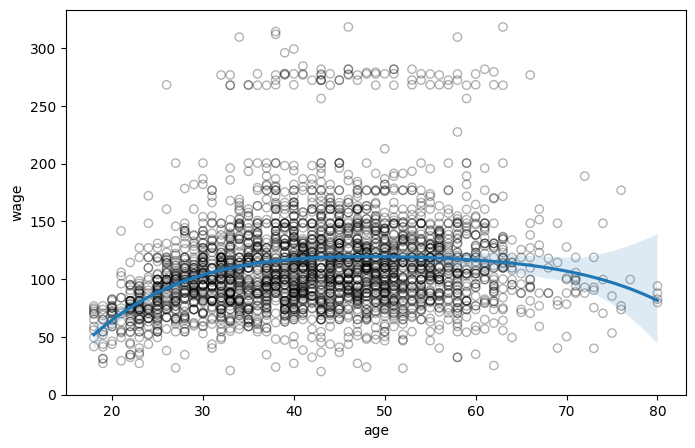

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(x=wage['age'], y=wage['wage'], order=4, truncate=True, scatter=False, ax=ax, ci=100)
ax.set_ylim(ymin=0)
plt.show()

#### Plotting polynomial regression curve by training the model by yourself

In [5]:
X = wage[['age']].values
Y = wage['wage'].values

regr = make_pipeline(
    PolynomialFeatures(4),
    LinearRegression(),
)
regr.fit(X, Y)

X_grid = np.arange(np.min(X), np.max(X)).reshape(-1, 1)
Y_grid = regr.predict(X_grid)

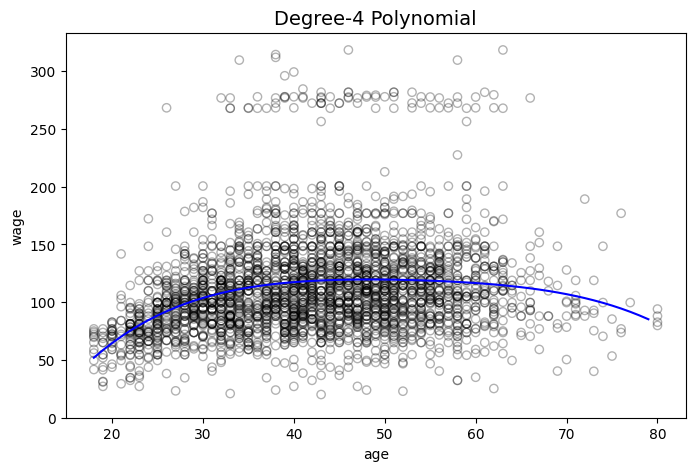

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(X_grid, Y_grid, color='b')

ax.set_title('Degree-4 Polynomial', fontsize=14)
ax.set_xlabel('age')
ax.set_ylabel('wage')
ax.set_ylim(ymin=0)
plt.show()

#### Exercise: Draw a logistic regression curve of the image below. [3min]
* Use income as the x-axis and limit as the y-axis of credit dataset.
* Plot 4-degree polynomial regression curve

<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-6.png' />

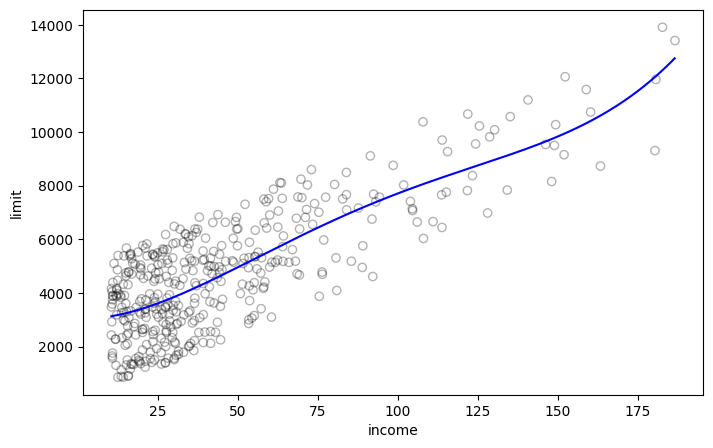

In [7]:
X = credit[['Income']].values
Y = credit['Limit'].values

regr = make_pipeline(
    PolynomialFeatures(4),
    LinearRegression(),
)
regr.fit(X, Y)

X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)
Y_grid = regr.predict(X_grid)


fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, Y, facecolor='None', edgecolor='k', alpha=.3)
ax.plot(X_grid, Y_grid, c='b')

ax.set_xlabel('income')
ax.set_ylabel('limit')
plt.show()

#### Probability Estimation with Logistic Regression

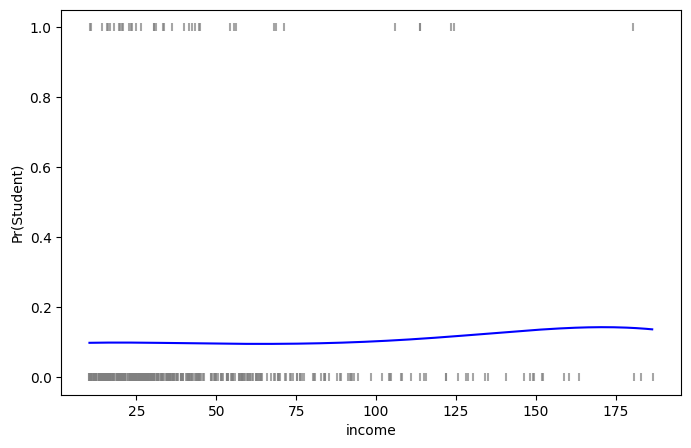

In [8]:
X = credit[['Income']].values
Y = credit['Student'].map({'Yes': True, 'No': False})
X_grid = np.arange(np.min(X), np.max(X)).reshape(-1, 1)

X_poly = PolynomialFeatures(4).fit_transform(X)
X_poly_grid = PolynomialFeatures(4).fit_transform(X_grid)

regr = Logit(Y, X_poly).fit(disp=0)
Y_grid = regr.predict(X_poly_grid)


# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X, Y, c='grey', marker='|', alpha=0.7)
ax.plot(X_grid, Y_grid, color='b');

ax.set_xlabel('income')
ax.set_ylabel('Pr(Student)')
plt.show()

#### Exercise: Draw the logistic regression line of the image below with the credit dataset. [5 min]

<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-1.png' />

* Use income as the x-axis and limit as the y-axis of credit dataset.
* Plot 4-degree polynomial regression curve

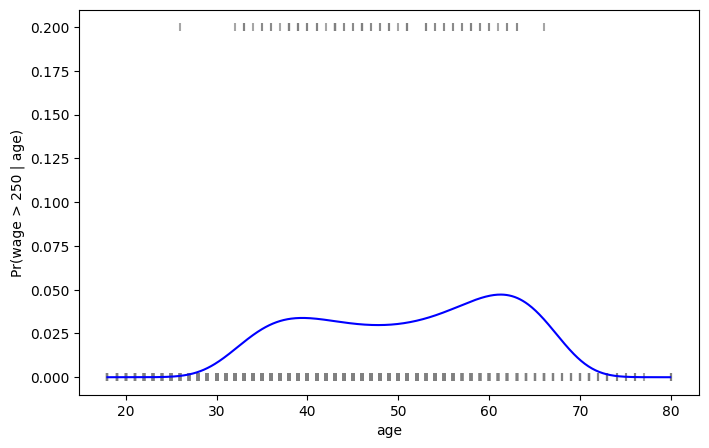

In [9]:
##### Exercise #####

# Assign binaries on whether the wage is larger than 250 or not to y.
wage_prob = (wage['wage'] > 250).values.astype(int)
X = wage[['age']].values
Y = wage_prob

X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)

X_poly = PolynomialFeatures(4).fit_transform(X)
X_poly_grid = PolynomialFeatures(4).fit_transform(X_grid)

regr = Logit(Y, X_poly).fit(disp=0)
Y_grid = regr.predict(X_poly_grid)


# Plot
fig, ax = plt.subplots(figsize=(8, 5))
# True on the top, False on the bottom.
ax.scatter(X, Y / 5, c='grey', marker='|', alpha=0.7)
ax.plot(X_grid, Y_grid, color='b');

ax.set_xlabel('age')
ax.set_ylabel('Pr(wage > 250 | age)')
plt.show()

### Polynomial Regression with Multiple Degrees

<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-2.png">

#### Exercise: Plot data and the regression curves of the above image on the figure below. [5 min]

In [10]:
def PolynomialRegression(degree=None):
    return make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )

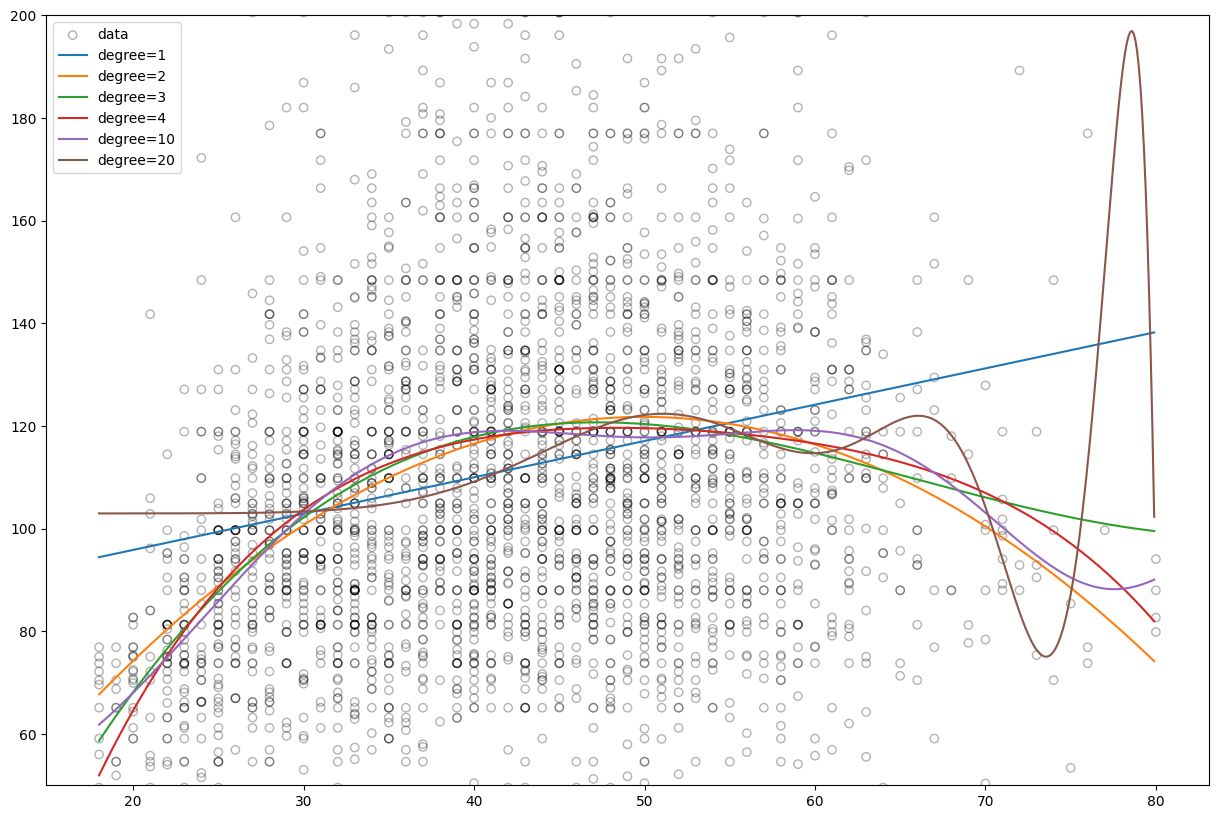

In [11]:
X = wage[['age']].values
Y = wage[['wage']].values

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim(50, 200)

# TODO: Draw data with the following parameters: {label: 'data', facecolor: 'none', edgecolor: 'k', alpha: 0.3}
ax.scatter(X, Y, label='data', facecolor='none', edgecolor='k', alpha=0.3)

for degree in [1, 2, 3, 4, 10, 20]:
    # TODO: Create a model instance.
    clf = PolynomialRegression(degree)

    # TODO: Train the model.
    clf.fit(X, Y)

    # TODO: Create a grid. range: min(X) ~ max(X), interval: 0.1
    X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)

    # TODO: Run the model to predict values.
    Y_grid = clf.predict(X_grid)

    # TODO: Plot the predicted values.
    ax.plot(X_grid, Y_grid, label=f'degree={degree}')

ax.legend()
plt.show()

### Finding the best degree for polynomial regression

Generating a random data with the polynomial degree 5

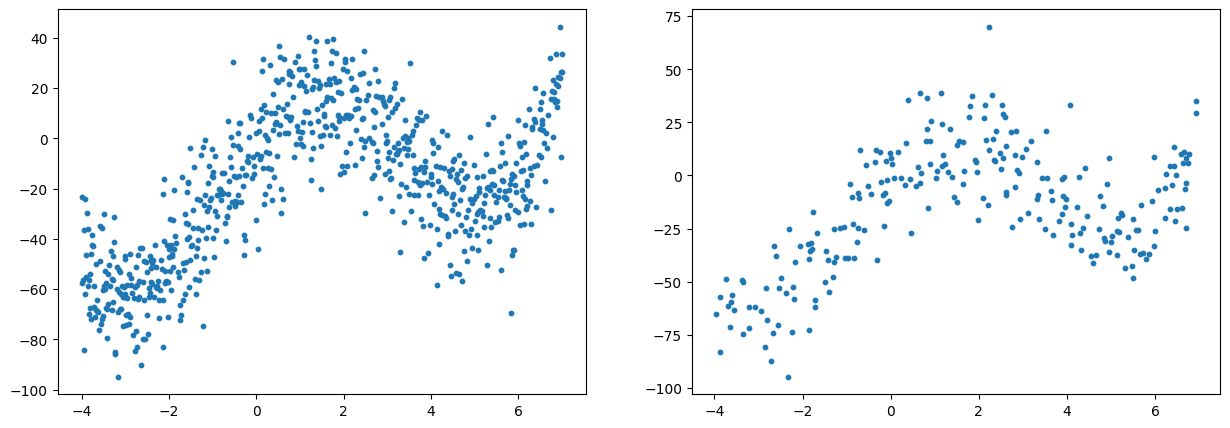

In [12]:
np.random.seed(1)
X = np.linspace(-4, 7, 1000)
Y = 20 * X - 5 * X ** 2 - 1 * X ** 3 + 0.2 * X ** 4 + np.random.normal(-3, 15, X.shape[0])
X = X.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5)

figure, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.scatter(X_train, Y_train, s=10)
ax1.scatter(X_test, Y_test, s=10)
plt.show()

#### Exercise: Draw the data and the  regression curves of the image below (10 min)
<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-3.png">

Use `X_train` and `Y_train` for the regression.

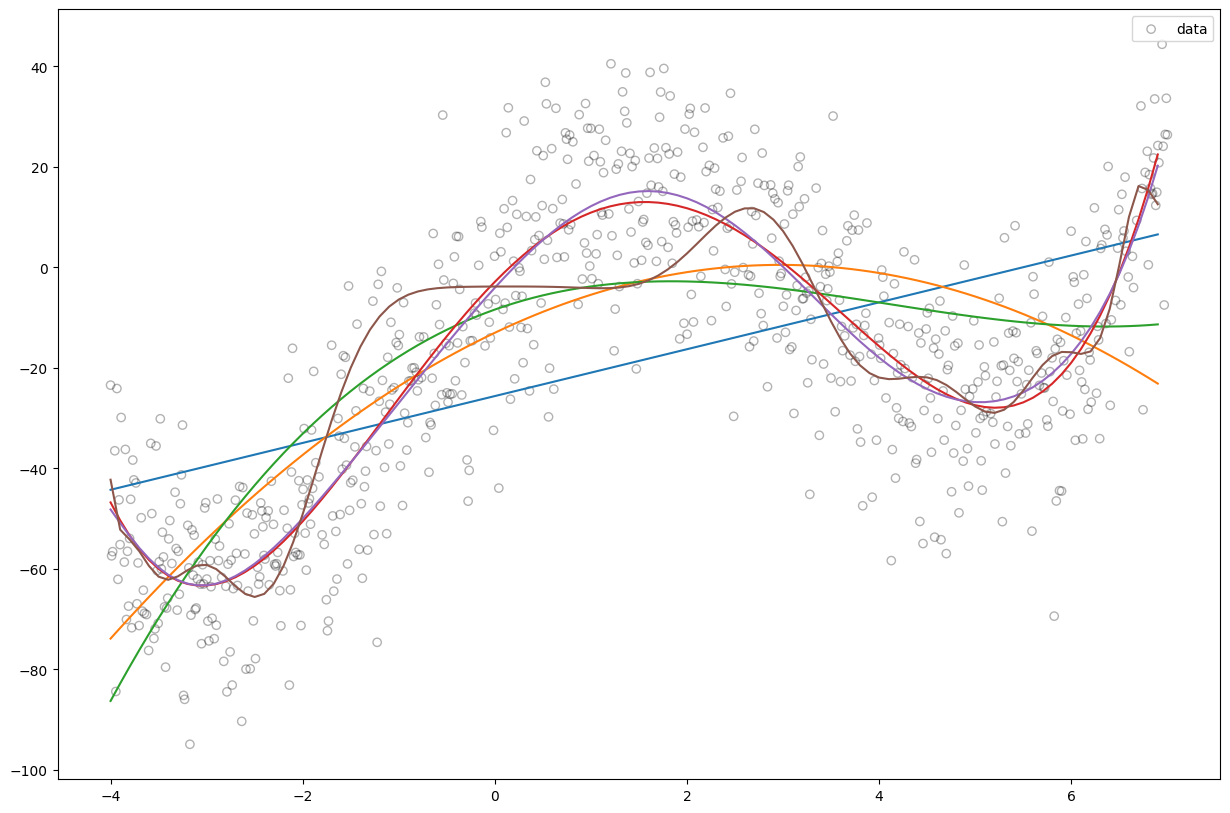

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

X_grid = np.arange(np.min(X_train), np.max(X_train), 0.1).reshape(-1, 1)
for degree in [1, 2, 3, 4, 10, 20]:
    clf = PolynomialRegression(degree)
    clf.fit(X_train, Y_train)
    Y_grid = clf.predict(X_grid)
    ax.plot(X_grid, Y_grid)

ax.scatter(X_train, Y_train, label='data', facecolor='none', edgecolor='k', alpha=0.3)

ax.legend()
plt.show()

#### Finding the best loss

<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-4.png">

#### Exercise: Let's draw the graph above. (Step 1 ~ Step 3) [10 min]

#### Exercise: Step 1: Run grid search.

* Use ```GridSearchCV``` with ```PolynomialRegression```.
* Pass ```{'Polynomial Features__degree': degrees}``` to ```GridSearchCV``` as a parameter.
* Use ```'neg_mean_squared_error'``` for the scoring method.
* You also need to pass ```True``` as a ```return_train_score``` parameter.

In [14]:
degrees = list(range(3, 16))
parameters = {'polynomialfeatures__degree': degrees}
regr = GridSearchCV(PolynomialRegression(), parameters, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
regr.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=None)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

#### Exercise: Step 2: Get train errors, cross validation errors, and test errors.
* Get ```mean_train_score``` and ```mean_test_scores``` from the grid search results and save them to ```train_errors``` and ```cv_errors``` each.
* For each degree, train ```PolynomialRegression``` model and get the test error with ```mean_squared_error``` function.

Expected results:
```
train errors:
 [404.20148672 211.42155277 211.30929552 210.31065383 210.18580973
 209.80031717 209.64626533 209.56266022 209.49534568 209.45829024
 208.48010635 208.41604738 208.17294383]
cross validation errors:
 [410.39117682 214.41878765 214.73994789 214.16564731 214.80338374
 214.72089807 215.21375817 215.71341747 216.88527307 217.48325122
 217.50923652 218.42281158 218.9727831 ]
test errors:
 [385.2064310638468, 231.24248723324033, 231.7272636199667, 232.57026792254462, 232.90170248940277, 233.74996174281037, 233.4874828611583, 233.82967121769713, 233.90236026028845, 233.87975536631518, 238.3408693235651, 237.899757747921, 239.05531338897976]
```

In [15]:
train_errors, cv_errors, test_errors = [], [], []

train_errors = -regr.cv_results_['mean_train_score']
cv_errors = -regr.cv_results_['mean_test_score']

for degree in degrees:
    Y_pred = PolynomialRegression(degree).fit(X_train, Y_train).predict(X_test)
    test_errors.append(mean_squared_error(Y_test, Y_pred))

print('train errors:\n', train_errors)
print('cross validation errors:\n', cv_errors)
print('test errors:\n', test_errors)

train errors:
 [404.20148672 211.42155277 211.30929552 210.31065383 210.18580973
 209.80031717 209.64626533 209.56266022 209.49534568 209.45829024
 208.48010635 208.41604744 208.17294402]
cross validation errors:
 [410.39117682 214.41878765 214.73994789 214.16564731 214.80338374
 214.72089807 215.21375818 215.71341723 216.88527258 217.48324568
 217.50926607 218.42342203 218.97241006]
test errors:
 [385.2064310638468, 231.24248723323578, 231.72726361995348, 232.57026792269764, 232.90170248852004, 233.7499617270617, 233.48748282353338, 233.8296713076107, 233.90235818944853, 233.87976090417172, 238.3409229991932, 237.8989917690669, 239.05805726336774]


#### Exercise: Step 3: Draw the graph above.

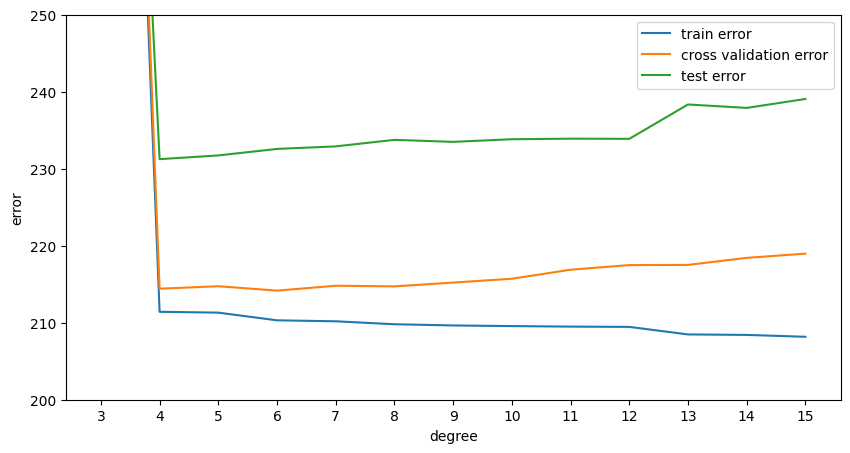

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(degrees, train_errors, label='train error')
ax.plot(degrees, cv_errors, label='cross validation error')
ax.plot(degrees, test_errors, label='test error')

ax.set_ylim(200, 250)
ax.set_xticks(degrees)
ax.set_xlabel('degree')
ax.set_ylabel('error')
ax.legend()
plt.show()

#### Print the best parameter

In [17]:
print(f'Best Parameter (cross-validation): {regr.best_params_}')

Best Parameter (cross-validation): {'polynomialfeatures__degree': 6}


## 7.2 Step Function

### Figure 7.2

<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-5.png'/>

In [18]:
X = wage[['age']].values
Y = wage['wage'].values
Y_prob = wage_prob

X_steps, bins = pd.cut(X.reshape(-1), 4, retbins=True, right=True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [19]:
X_steps

[(17.938, 33.5], (17.938, 33.5], (33.5, 49.0], (33.5, 49.0], (49.0, 64.5], ..., (33.5, 49.0], (17.938, 33.5], (17.938, 33.5], (17.938, 33.5], (49.0, 64.5]]
Length: 3000
Categories (4, interval[float64, right]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]

In [20]:
pd.concat([
    wage['age'],
    pd.Series(X_steps),
    wage['wage'],
],
keys=[
    'age',
    'age_steps',
    'wage',
], axis=1).head(5)

,age,age_steps,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


In [21]:
X_steps_one_hot = pd.get_dummies(X_steps)
X_steps_one_hot.head(5)

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,False,False,True,False


In [22]:
# Regression
regr_lr = LinearRegression()
regr_lr.fit(X_steps_one_hot.values, Y)

# Logistic Regression
regr_logit = Logit(Y_prob, X_steps_one_hot).fit()

Optimization terminated successfully.
         Current function value: 0.118282
         Iterations 9


In [23]:
# Put the test data in the same bins as the training data.
X_grid = np.arange(wage['age'].min(), wage['age'].max(), 0.1)
X_grid_one_hot = pd.get_dummies(np.digitize(X_grid, bins))
X_grid_one_hot.head()

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [24]:
# Linear Regression
Y_pred_lr = regr_lr.predict(X_grid_one_hot)

# Logistic Regression
Y_pred_logit = regr_logit.predict(X_grid_one_hot)

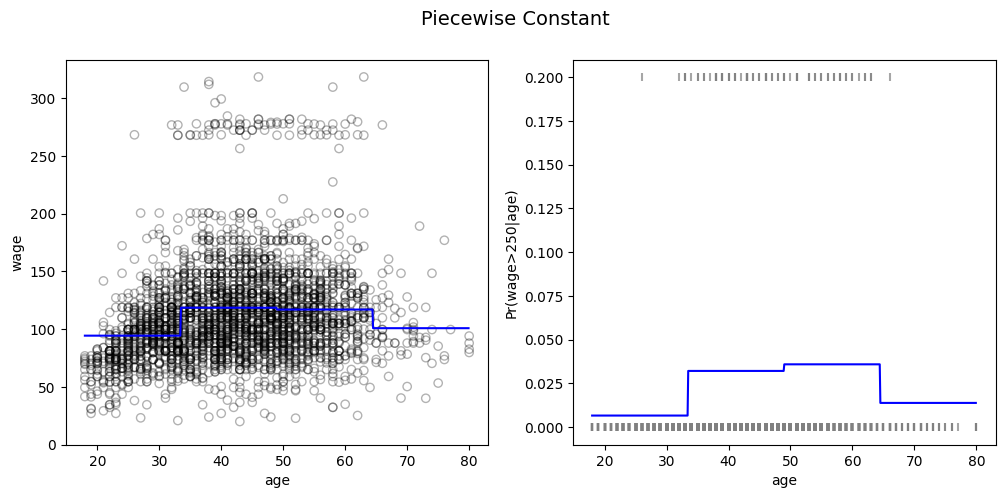

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Piecewise Constant', fontsize=14)

ax1.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(X_grid, Y_pred_lr, c='b')
ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)


ax2.plot(X_grid, Y_pred_logit, color='b')
ax2.scatter(wage['age'], wage_prob / 5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')

plt.show()

#### Exercise: Step function [5 min]
* Draw step function graph with credit dataset.
* Use income as the x-axis and limit as the y-axis.

<img src='https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/7-8.png' />

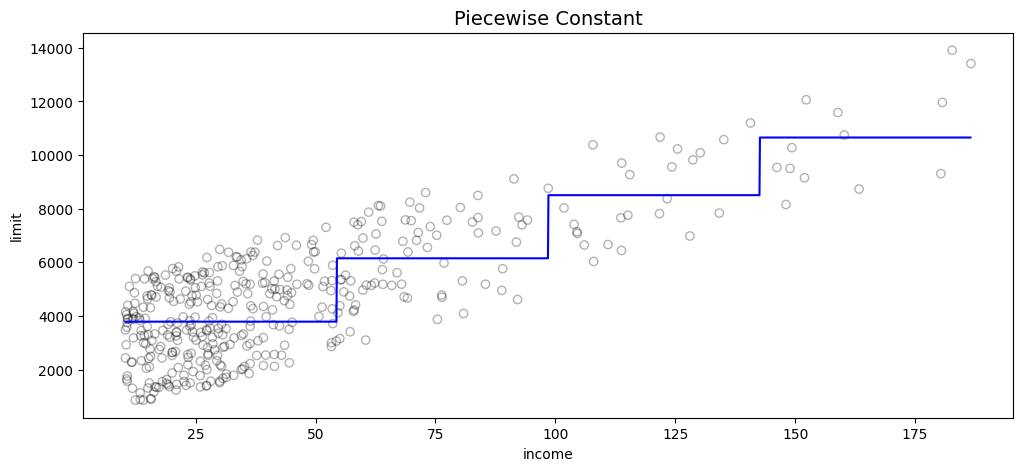

In [26]:
X = credit[['Income']].values
Y = credit['Limit'].values

X_steps, bins = pd.cut(X.reshape(-1), 4, retbins=True, right=True)
X_steps_one_hot = pd.get_dummies(X_steps).values

X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)
X_grid_one_hot = pd.get_dummies(np.digitize(X_grid.reshape(-1), bins))


regr = LinearRegression()
regr.fit(X_steps_one_hot, Y)
Y_pred = regr.predict(X_grid_one_hot)


# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)
ax.plot(X_grid, Y_pred, c='b')

ax.set_title('Piecewise Constant', fontsize=14)
ax.set_xlabel('income')
ax.set_ylabel('limit')
plt.show()

## 7.3 Splines

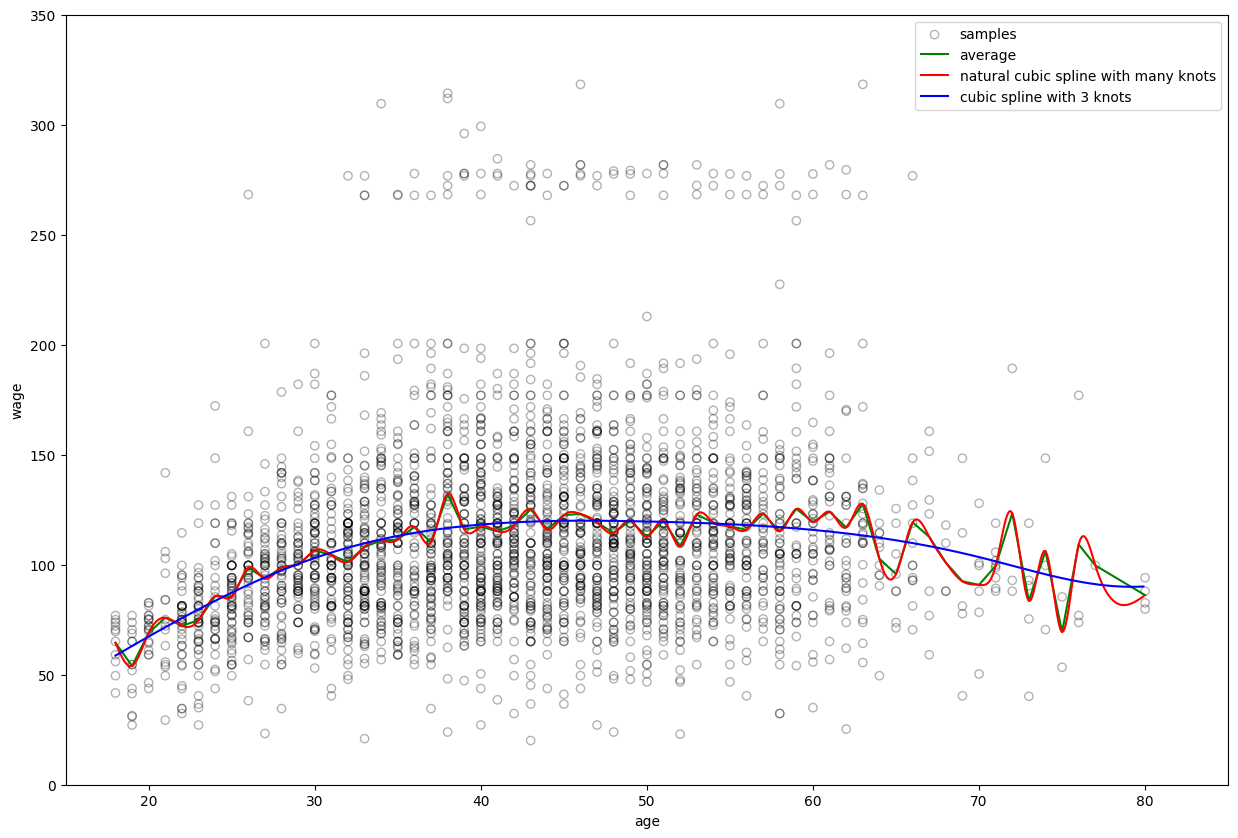

In [27]:
avg_age = wage[['age', 'wage']].groupby('age').mean()
X = avg_age.index.values
Y = avg_age['wage'].values
knots = [30, 50, 70]

spline_all = CubicSpline(X, Y, axis=0, bc_type='natural')
spline_knots = LSQUnivariateSpline(X, Y, knots, k=3)

X_grid = np.arange(np.min(X), np.max(X), 0.1)
Y_spline_all = spline_all(X_grid)
Y_spline_knots = spline_knots(X_grid)


# Plot
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.3, label='samples')
ax.plot(X, Y, c='g', label='average')
ax.plot(X_grid, Y_spline_all, c='r', label='natural cubic spline with many knots')
ax.plot(X_grid, Y_spline_knots, c='b', label='cubic spline with 3 knots')

ax.legend()
ax.set_xlim(15,85)
ax.set_ylim(0,350)
ax.set_xlabel('age')
ax.set_ylabel('wage')
plt.show()